Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None

First 5 Rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6  

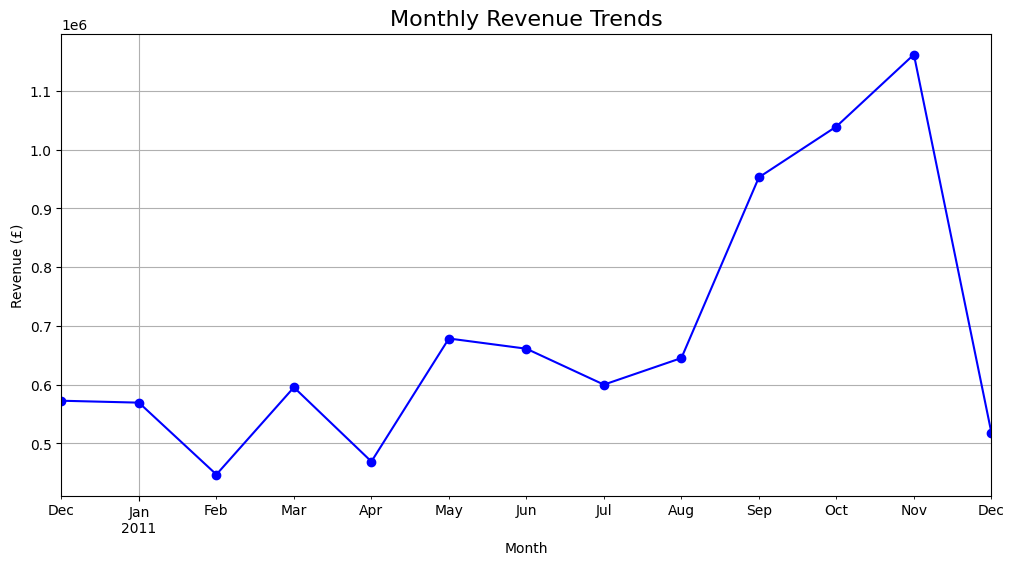

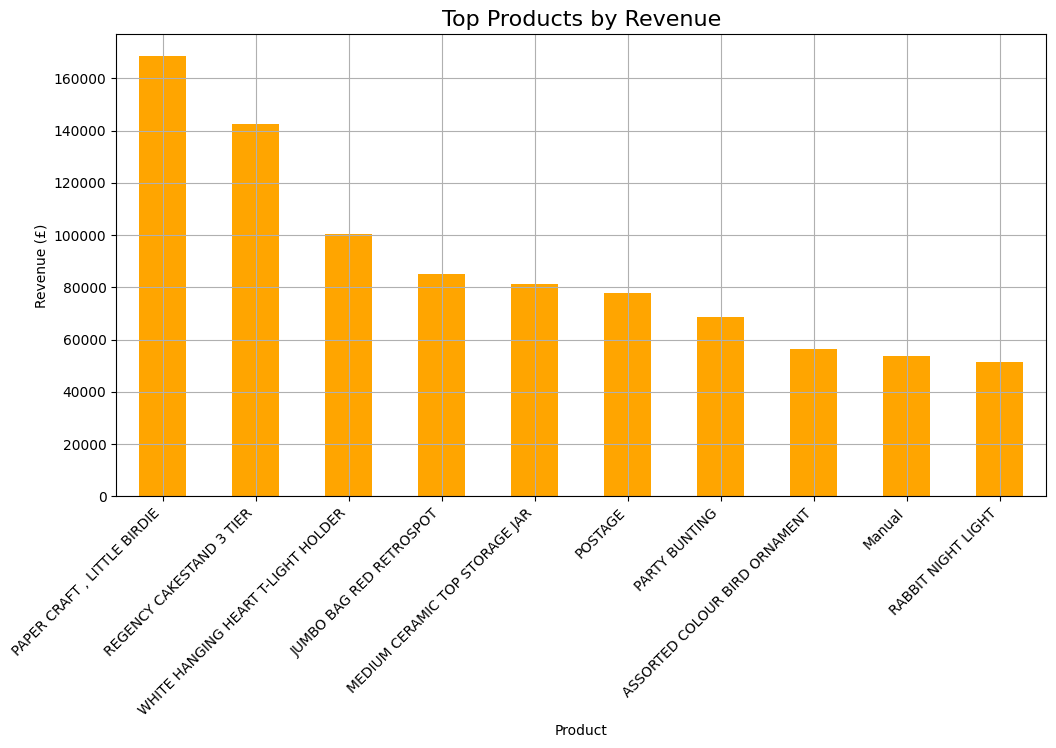

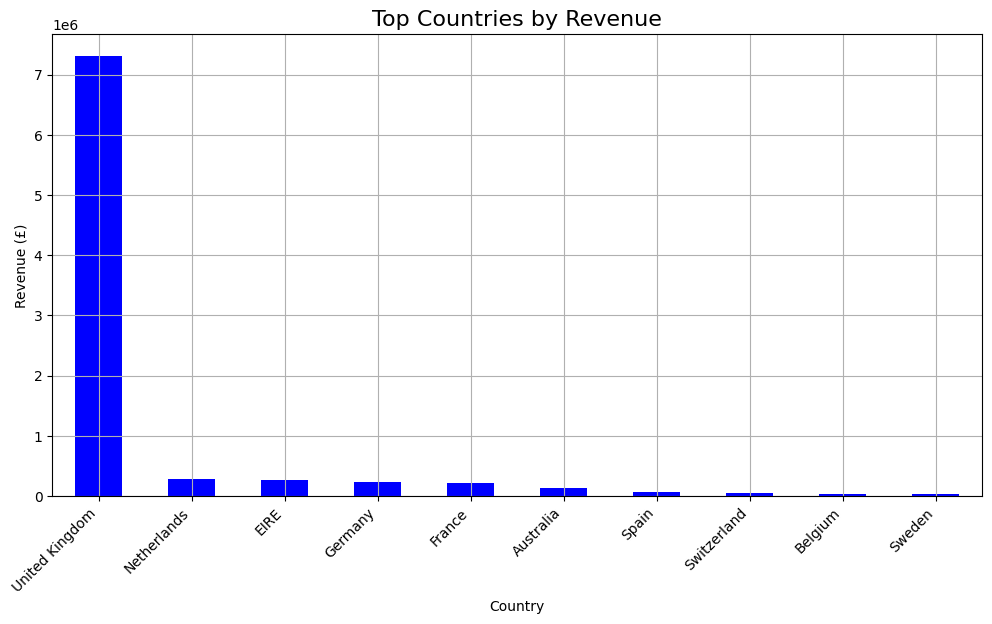

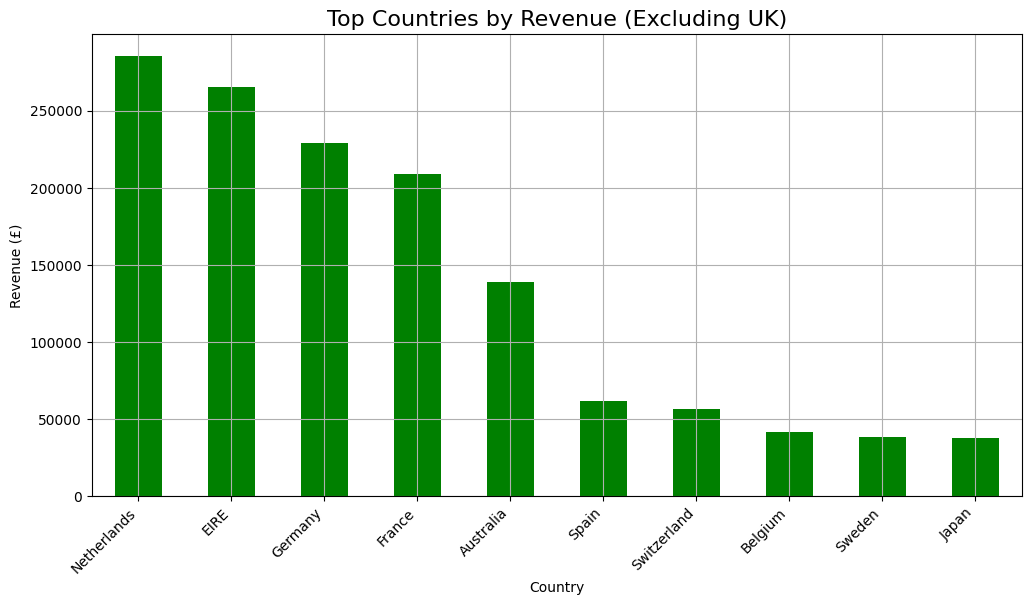


RFM Metrics:
            Recency  Frequency  Monetary
CustomerID                              
12346.0         326          1  77183.60
12347.0           2        182   4310.00
12348.0          75         31   1797.24
12349.0          19         73   1757.55
12350.0         310         17    334.40


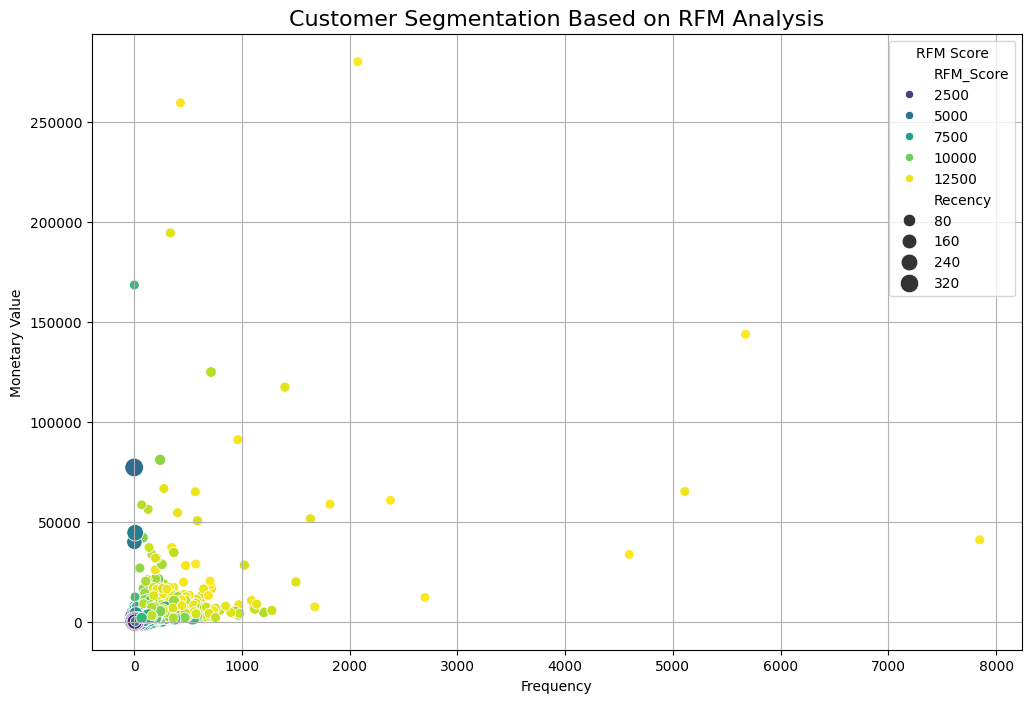

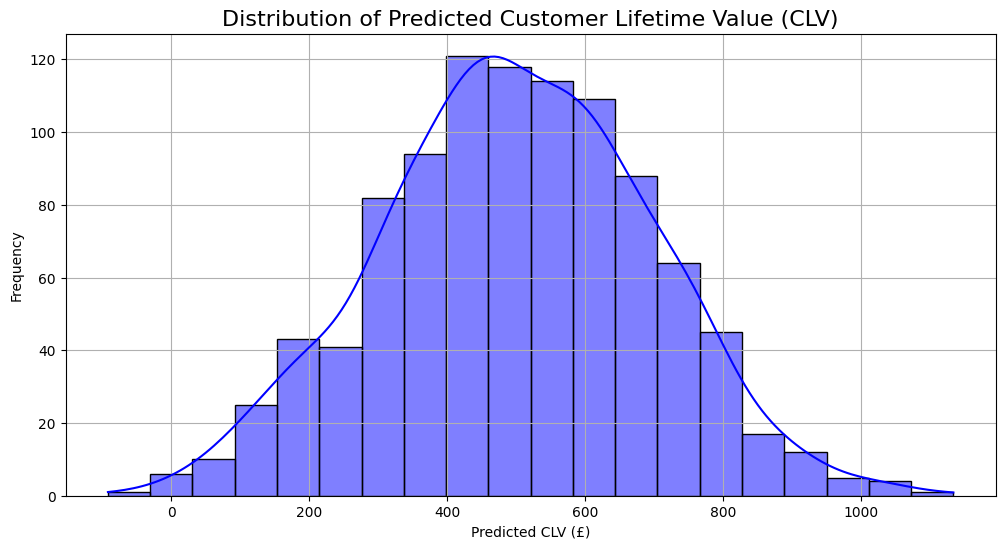

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('C:/Users/Admin/OnlineRetail_Analysis/data/Online_Retail.csv')
print("Dataset Structure:")
print(data.info())

# Display first few rows
print("\nFirst 5 Rows:")
print(data.head())

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Data Cleaning
data_cleaned = data.dropna(subset=['CustomerID'])

# Filter out negative or zero UnitPrice and Quantity
data_cleaned = data_cleaned[(data_cleaned['UnitPrice'] > 0) & (data_cleaned['Quantity'] > 0)]

# Add Revenue column
data_cleaned['Revenue'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']

# Metrics Calculations
total_revenue = data_cleaned['Revenue'].sum()
total_units_sold = data_cleaned['Quantity'].sum()
total_transactions = data_cleaned['InvoiceNo'].nunique()
average_transaction_value = total_revenue / total_transactions

# Return Transactions
returns = data[data['Quantity'] < 0]
return_transactions = returns['InvoiceNo'].nunique()
percentage_returns = (return_transactions / total_transactions) * 100

# Display Metrics
print("\nKey Performance Metrics:")
print(f"Total Revenue: \u00a3{total_revenue:,.2f}")
print(f"Total Units Sold: {total_units_sold:,.0f}")
print(f"Total Transactions: {total_transactions}")
print(f"Average Transaction Value: \u00a3{average_transaction_value:,.2f}")
print(f"Return Transactions: {return_transactions} ({percentage_returns:.2f}%)")

# Plot Monthly Revenue Trends
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])
data_cleaned['Month'] = data_cleaned['InvoiceDate'].dt.to_period('M')
monthly_revenue = data_cleaned.groupby('Month')['Revenue'].sum()

plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Revenue Trends', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Revenue (\u00a3)')
plt.grid(True)
plt.show()

# Plot Top Products by Revenue
top_products = data_cleaned.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='orange')
plt.title('Top Products by Revenue', fontsize=16)
plt.xlabel('Product')
plt.ylabel('Revenue (\u00a3)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


# Plot visualizing Top Countries by Revenue
country_revenue = data_cleaned.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
country_revenue.plot(kind='bar', color='blue')
plt.title('Top Countries by Revenue', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Revenue (\u00a3)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

# Plot Top Countries by Revenue (Excluding UK)
country_revenue = data_cleaned.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
country_revenue = country_revenue.drop('United Kingdom', errors='ignore').head(10)

plt.figure(figsize=(12, 6))
country_revenue.plot(kind='bar', color='green')
plt.title('Top Countries by Revenue (Excluding UK)', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Revenue (\u00a3)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

# Plot RFM Analysis
import datetime as dt
reference_date = data_cleaned['InvoiceDate'].max() + dt.timedelta(days=1)

rfm = data_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'count',
    'Revenue': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Revenue': 'Monetary'
})

print("\nRFM Metrics:")
print(rfm.head())

# Plot Scatter Plot for RFM Analysis
rfm['RFM_Score'] = (rfm['Recency'].rank(ascending=False) +
                    rfm['Frequency'].rank(ascending=True) +
                    rfm['Monetary'].rank(ascending=True))

plt.figure(figsize=(12, 8))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='RFM_Score', size='Recency', palette='viridis', sizes=(50, 200))
plt.title('Customer Segmentation Based on RFM Analysis', fontsize=16)
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.grid(True)
plt.legend(title='RFM Score')
plt.show()
    

# Plot distribution of CLV
import numpy as np
clv_predictions = np.random.normal(500, 200, 1000)  # Replace with actual CLV data
# Plot
plt.figure(figsize=(12, 6))
sns.histplot(clv_predictions, kde=True, color='blue', bins=20)
plt.title('Distribution of Predicted Customer Lifetime Value (CLV)', fontsize=16)
plt.xlabel('Predicted CLV (£)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
